# Introduksjon til clustering

## Styrt vs. ikke-styrt læring

Så langt har vi sett på klassifikasjon og regresjon der vi har en fasit vi ønsker

- Eksepler på styrt og ikke-styrt
- 2D-eksempler (simulert) trinn for trinn
- Oppgaver underveis.
    - Hvilket clustersenter hører dette punktet til?
    - Hvor mange clustre er det her?
- Forskjell på antall clustre
- Vis koden
- Imbd-datasettet som eksempel

## Styrt vs. ikke-styrt læring

Så langt har alle metodene vi har sett på, vært eksempler på *styrt* læring. Det vil si at vi når vi trener, gir vi maskinen fasiten i tillegg til resten av dataene. Maskinen kan under treningen altså kontrollere om den får riktige svar.

I ikke-styrt læring gjør vi altså ikke dette. I de fleste tilfeller har vi ikke engang en fasit vi kunne sendt med om vi ville, så vi kan ikke nødvendigvis finne nøyaktigheten til modellen. 

De ikke-styrte metodene brukes derfor i stedet til å finne "gjemt" struktur i dataene.

Vi ser på dataene nedenfor

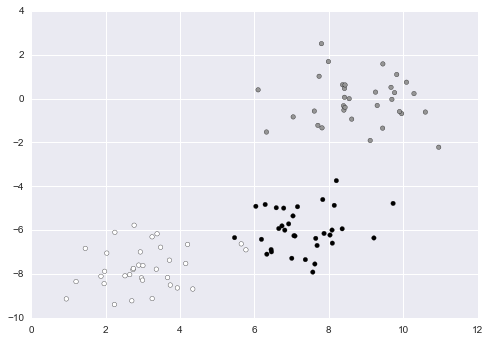

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

# X, y = make_blobs(random_state=100)
X, y = make_blobs(random_state=1000)
# X, y = make_blobs(random_state=165)
# X, y = make_blobs(random_state=3218)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Vi kan her se at datene helt klart kan deles inn i tre forskjellige grupper. Men dette ser naturligvis ikke datamaskinen helt uten videre. Allikevel ønsker vi å finne disse.

Vi vil gå frem ved å prøve å finne senterne i hver av gruppene (clusters), og vi vil bruke algoritmen som heter *K-means*

##  K-Means

K-means (K gjennomsnit) forsøker gjentatte ganger å gjette på hvor senterne befinner seg. Dette gjøres ved at punktene settes til å tilhøre det senteret de er nærmest. Så regnes plasseringen til senterne ut på nytt ved å finne gjennomsnittet av punktene i gruppa (i begge dimensjoner) og sette det nye senteret til å være resultatet av dette. Dette fortsetter helt til vi ikke får noen endring, eller hvis vi når en grense på hvor mange ganger vi regner ut senterne på nytt.

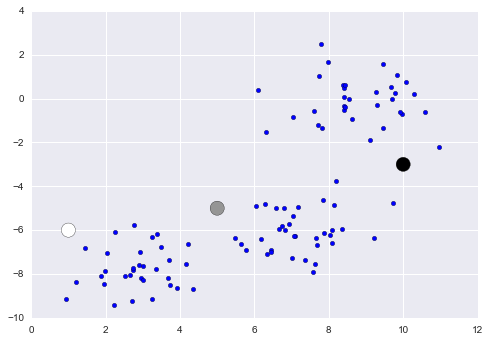

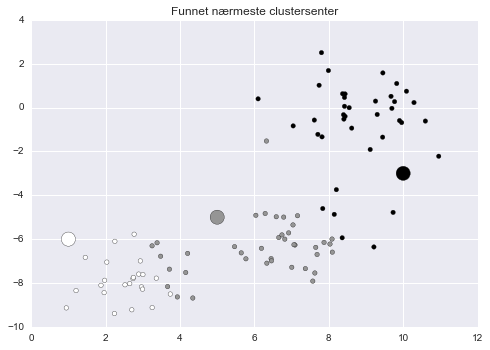

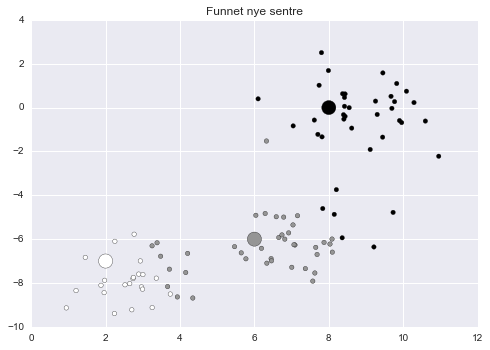

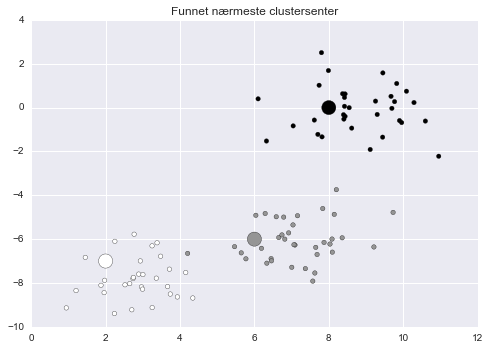

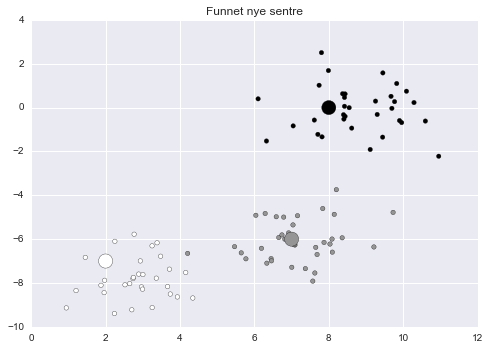

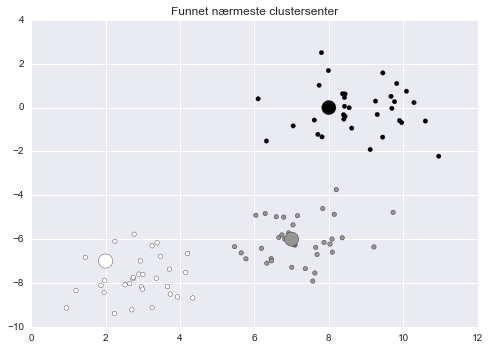

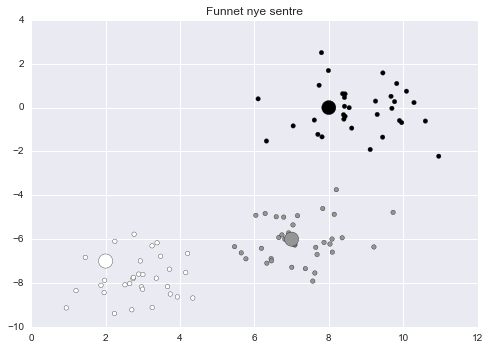

In [60]:
# startsentre
centers = np.array([[1, -6], [5, -5], [10, -3]])

clusters = np.zeros(X.shape[0])
max_iter = 3

plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1], c=[0, 1, 2], s=200)

# Denne koden gjør Kmeans, og plotter underveis
for _ in range(max_iter):
    clusters = np.zeros(X.shape[0])

    # Kalkulerer nærmeste clustersenter
    for i, x in enumerate(X):
        distances = list(np.sqrt(np.sum((centers - x)**2, axis=1)))
        min_index = distances.index(min(distances))
#         print(distances, min_index)
        clusters[i] = distances.index(min(distances))
    
    # Plotting
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=clusters)
    plt.scatter(centers[:,0], centers[:,1], s=200, c=[0,1,2])
    plt.title('Funnet nærmeste clustersenter')
    
    # Kalkulerer nye sentre
    for i in [0, 1, 2]:
        current = X[clusters == i]
        if len(current) != 0:
            centers[i] = np.mean(current, axis=0)        
    
    # Plotter nye sentre
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=clusters)
    plt.scatter(centers[:,0], centers[:,1], s=200, c=[0,1,2])
    plt.title('Funnet nye sentre')

plt.show()